In [2]:
# python/fashion_mnist_cnn.py
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

# Build CNN model
model = Sequential([
    Input(shape=(28, 28, 1)),  # Add Input layer explicitly
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile and train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train_cat, epochs=5, batch_size=64, validation_split=0.1)

# Save model
model.save("my_model.keras")


Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 20s 22ms/step - accuracy: 0.7024 - loss: 0.8334 - val_accuracy: 0.8588 - val_loss: 0.3842
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - accuracy: 0.8457 - loss: 0.4285 - val_accuracy: 0.8723 - val_loss: 0.3420
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8691 - loss: 0.3587 - val_accuracy: 0.8862 - val_loss: 0.3074
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 17s 21ms/step - accuracy: 0.8797 - loss: 0.3290 - val_accuracy: 0.8978 - val_loss: 0.2787
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 18s 21ms/step - accuracy: 0.8912 - loss: 0.3013 - val_accuracy: 0.8988 - val_loss: 0.2739


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step


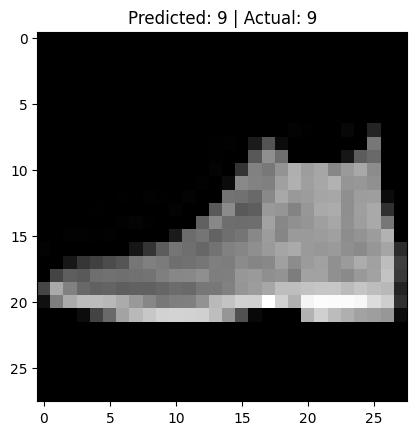

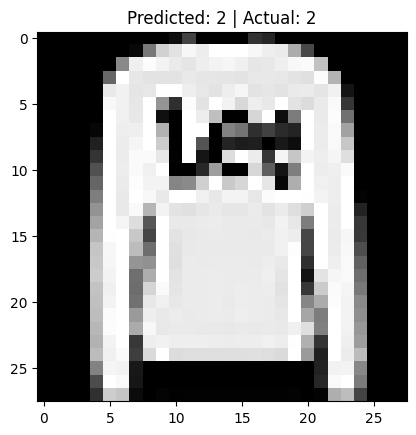

In [4]:
from keras.models import load_model
from keras.datasets import fashion_mnist
import numpy as np
import matplotlib.pyplot as plt

model = load_model("fashion_mnist_model.h5")

# Recompile model to avoid the warning
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

(_, _), (x_test, y_test) = fashion_mnist.load_data()
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

predictions = model.predict(x_test[:2])

for i in range(2):
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"Predicted: {np.argmax(predictions[i])} | Actual: {y_test[i]}")
    plt.show()
